In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t

# 1. 추론통계

## 자유도가 2일 경우 t분포 그래프

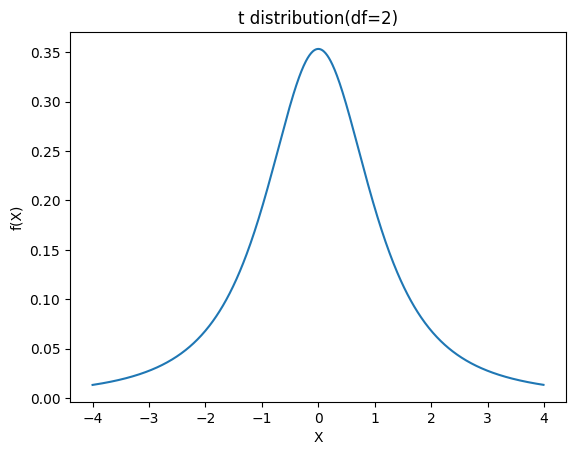

In [7]:
df=2
x=np.arange(-4,4,0.01)
y=t.pdf(x,df)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('t distribution(df=2)')
plt.show()

## 자유도 2인 t분포에 대해서 P(-2≤t ≤ 2) 계산

In [8]:
df=2
y1= t.cdf(2,df)
y2= t.cdf(-2,df)

print('P(-2<= t <= 2)=', y1-y2)

P(-2<= t <= 2)= 0.816496580927726


## t분포에 대한 누적분포함수의 역함수 

In [9]:
df=2
percent_point = 0.95

print('P(x<=k)=0.95, k=', t.ppf(percent_point,df))

P(x<=k)=0.95, k= 2.919985580355516


# 3. 가설검정 t-test

           coeffee
count    42.000000
mean   3119.047619
std    1147.263573
min    1500.000000
25%    1800.000000
50%    3500.000000
75%    4100.000000
max    4800.000000


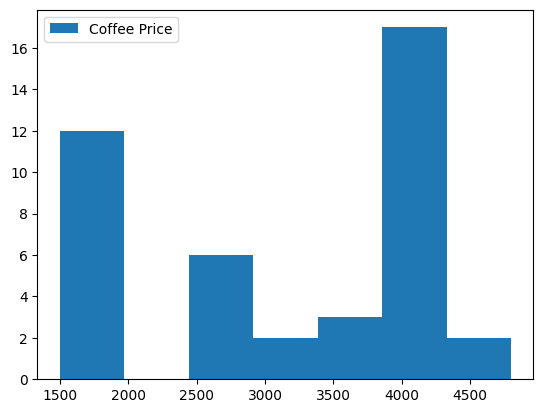

TtestResult(statistic=0.3617965577523089, pvalue=0.7193620858263579, df=41)
TtestResult(statistic=0.3617965577523089, pvalue=0.3596810429131789, df=41)


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

data = pd.DataFrame(pd.read_excel("../assets/커피가격.xlsx"))
mu = 3055

# data에 대한 기술통계량 출력
print(data.describe())

plt.hist(data, label='Coffee Price', bins=7)    # 막대 수를 7개로 하고 범례 내용 작성
plt.legend()                                    # 범례('bins=5')를 그래프에 배치함
plt.show()                                      # 히스토그램을 화면에 출력

# 만약 양측검정이라면
result = stats.ttest_1samp(data.coeffee, mu, alternative='two-sided')
print(result)

# 단측검정의 경우
result = stats.ttest_1samp(data.coeffee, mu, alternative='greater')
print(result)

## 독립인 두 표본에 대한 평균차이의 t검정(등분산 가정)

             male     female
count  100.000000  98.000000
mean    31.273000  32.876531
std      2.912767   3.269282
min     22.200000  24.400000
25%     29.300000  30.900000
50%     31.100000  32.750000
75%     32.975000  34.900000
max     38.900000  41.700000


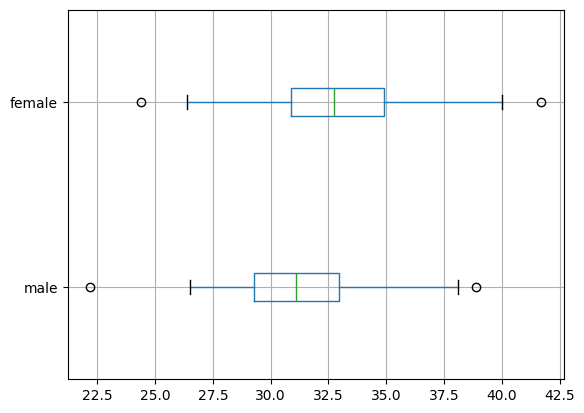

TtestResult(statistic=-3.645768621069706, pvalue=0.00034151561881195217, df=196.0)


In [13]:
import numpy as np 
import pandas as pd
from scipy import stats

data = pd.read_excel("../assets/성인_스마트폰_이용시간.xlsx")
print(data.describe())

from matplotlib import pyplot as plt
# 수평의 상자도형 (False의 F는 대문자로)
data.boxplot(column=["male", "female"], vert=False)
plt.show()

d1 = pd.read_excel("../assets/성인_스마트폰_이용시간_남자.xlsx")
d2 = pd.read_excel("../assets/성인_스마트폰_이용시간_여자.xlsx")

#result=stats.ttest_ind(d1.male, d2.female, alternative='two-sided')
result=stats.ttest_ind(d1.male, d2.female)
print(result)

### 독립인 두 표본에 대한 평균 차이의 t검정(이분산 가정)

            male     female
count  96.000000  99.000000
mean    7.018750   6.418182
std     1.862218   0.956755
min     3.200000   4.400000
25%     5.700000   5.800000
50%     7.000000   6.300000
75%     8.025000   7.000000
max    13.100000   8.900000


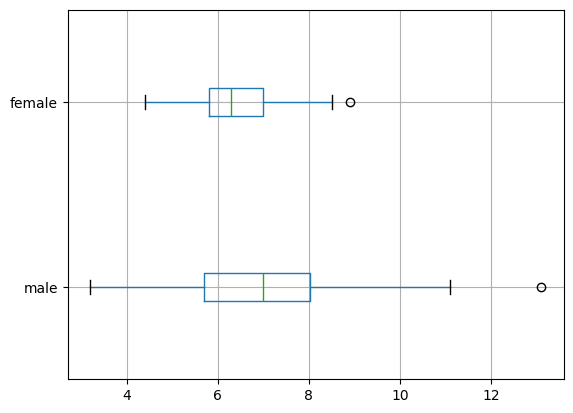

TtestResult(statistic=2.8450527424639183, pvalue=0.004919637444598858, df=193.0)


In [15]:
import numpy as np 
import pandas as pd
from scipy import stats

data = pd.read_excel("../assets/대학생_수면시간.xlsx")
print(data.describe())

from matplotlib import pyplot as plt
# 수평의 상자도형 (False의 F는 대문자로)
data.boxplot(column=["male", "female"], vert=False)
plt.show()

d1 = pd.read_excel("../assets/대학생_수면시간_남자.xlsx")
d2 = pd.read_excel("../assets/대학생_수면시간_여자.xlsx")

result=stats.ttest_ind(d1.male, d2.female, equal_var='False')
print(result)



### 독립인 두 표본에 대한 분산이  같은 지 검정

In [16]:
import numpy as np 
import pandas as pd
from scipy import stats

a1 = pd.read_excel("../assets/성인_스마트폰_이용시간_남자.xlsx")
a2 = pd.read_excel("../assets/성인_스마트폰_이용시간_여자.xlsx")

b1 = pd.read_excel("../assets/대학생_수면시간_남자.xlsx")
b2 = pd.read_excel("../assets/대학생_수면시간_여자.xlsx")

result1 = stats.levene(a1.male, a2.female, center='mean')
result2 = stats.levene(b1.male, b2.female, center='mean')

print(result1)
print(result2)


LeveneResult(statistic=0.4717550732460051, pvalue=0.4929926832749576)
LeveneResult(statistic=23.026579508637933, pvalue=3.1920354052893605e-06)


### 기술통계 결과를 이용하는 독립인 두 표본에 대한 t검정

In [ ]:
from scipy import stats

result=stats.ttest_ind_from_stats(7.02, 1.86, 96, 6.42, 0.96, 99, equal_var='False', alternative='greater')                               
print(result)



Ttest_indResult(statistic=2.842953712200941, pvalue=0.0024754104583474073)
